In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [2]:
file = open('dfs_for_al_.pkl', 'rb')
pre_df = pickle.load(file)
result_df_y = pickle.load(file)

display(pre_df.head())
display(result_df_y)
file.close()

,membership_type_low,membership_type_medium,new_sentiment_neutral,customer_state_SP,payment_value_sum,review_score_median,review_score_count,days_since_last_purchase
0,1,0,0,1,141.9,5.0,1,160
1,1,0,1,1,27.19,4.0,1,163
2,1,0,1,0,86.22,3.0,1,585
3,1,0,1,0,43.62,4.0,1,369
4,1,0,1,1,196.89,5.0,1,336


array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

## Splitting dataframes

In [19]:
test_sample_ratio = 0.9

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pre_df, 
    result_df_y, 
    stratify=result_df_y, 
    test_size=test_sample_ratio, 
    random_state=42)

## Baseline model

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Variable importance

In [28]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

membership_type_low         0.000714
membership_type_medium      0.000698
new_sentiment_neutral       0.005687
customer_state_SP           0.001957
payment_value_sum           0.019674
review_score_median         0.948142
review_score_count          0.002381
days_since_last_purchase    0.020747
dtype: float64

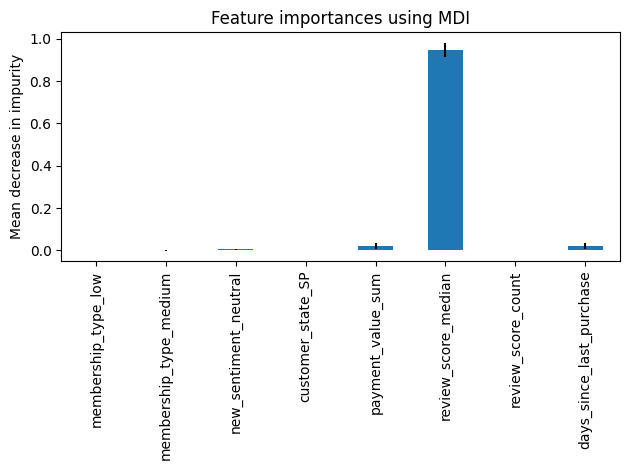

In [34]:
forest_importances = pd.Series(importances, index=pre_df.columns)
display(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


## Prediction

In [22]:
y_pred = rf.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9995888815293608


In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12784,     0,     0],
       [   36,  7222,     0],
       [    0,     0, 67524]])

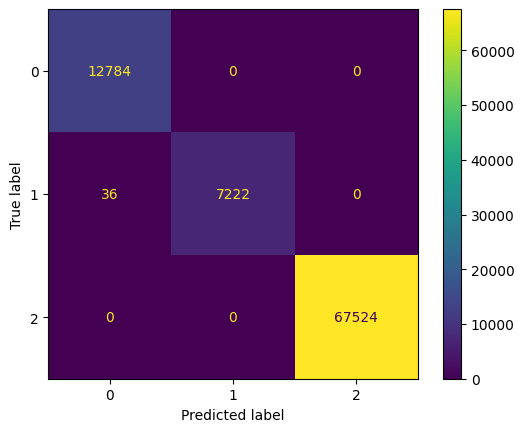

In [41]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [24]:
import graphviz

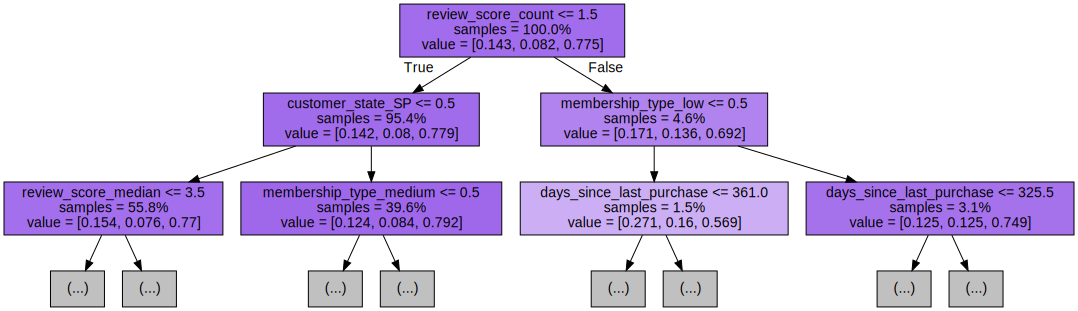

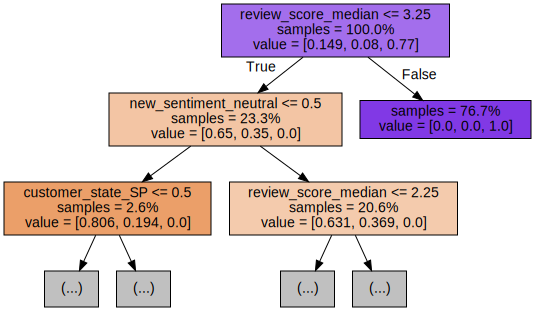

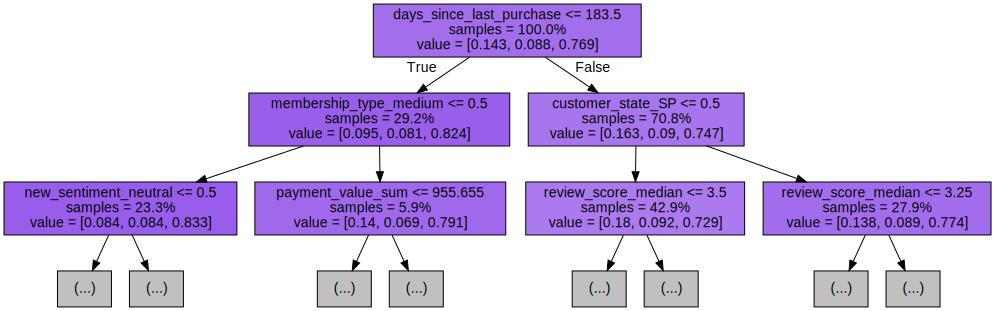

In [25]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)